In [ ]:
from google.colab import files
files.upload()

Saving test_data (1).csv to test_data (1).csv


{'test_data (1).csv': b'Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code\r\nH11920,2013,1,0,V,N,O,R,300,1,1960,3,3310\r\nH11921,2016,0.99726776,0,V,N,O,R,300,1,1960,3,3310\r\nH9805,2013,0.369863014,0,V,V,V,U,790,1,1960,   .,3310\r\nH7493,2014,1,0,V,N,O,R,1405,1,2004,3,3321\r\nH7494,2016,1,0,V,N,O,R,1405,1,2004,3,3321\r\nH10545,2012,1,0,V,V,V,U,3225,2,1988,   .,4070\r\nH8962,2015,0.98630137,0,N,V,V,U,31,2,,   .,4070\r\nH1015,2013,1,0,V,V,V,U,1400,2,1980,   .,4088\r\nH9710,2012,1,0,V,V,V,U,1300,2,,   .,4094\r\nH9029,2012,1,0,N,V,V,U,1200,2,,   .,4205\r\nH11274,2012,1,0,N,V,V,U,450,1,1960,   .,5061\r\nH10785,2012,1,0,N,V,V,U,410,1,1980,   .,5065\r\nH10786,2013,0.832876712,0,N,V,V,U,410,1,1980,   .,5065\r\nH882,2012,1,0,V,V,V,U,318,1,1980,   .,5065\r\nH10742,2014,1,0,V,N,O,R,360,1,2005,2,5079\r\nH12485,2014,1,1,V,N,O,R,1742,1,2006,4,5085\r\nH10972,2015,1,0,

In [ ]:
!pip install missingno

In [ ]:
!pip install catboost

In [ ]:
!pip install lightgbm

# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [ ]:
test_raw = pd.read_csv('test_data (1).csv')
train_raw = pd.read_csv('train_data.csv')
train_labels_raw = pd.read_csv('train_labels.csv')
feature_desc = pd.read_csv('VariableDescription.csv')
sub = pd.read_csv('sample_submission (1).csv')

# Let's take a quick look at the data

In [ ]:
test_raw.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [ ]:
train_raw.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [ ]:
train_labels_raw.head()

,image,target
0,tfymlmdkpzkqdjhdxyhnoeuqszxphw.jpg,0
1,rxgismgsvmaayzjarbfjaljhqmpbrt.jpg,1
2,uuzshfrhkgrkolhwdvliqauzulurnz.jpg,0
3,mjspxsagzusaznvnyxgamtrlqkqklp.jpg,0
4,rlbmuajgezfiddjzlyeoupxpqubkpt.jpg,1


In [ ]:
feature_desc

,Variable,Description
0,Customer Id,Identification number for the Policy holder
1,YearOfObservation,year of observation for the insured policy
2,Insured_Period,duration of insurance policy in Olusola Insura...
3,Residential,is the building a residential building or not
4,Building_Painted,"is the building painted or not (N-Painted, V-N..."
5,Building_Fenced,"is the building fence or not (N-Fenced, V-Not ..."
6,Garden,building has garden or not (V-has garden; O-no...
7,Settlement,Area where the building is located. (R- rural ...
8,Building Dimension,Size of the insured building in m2
9,Building_Type,"The type of building (Type 1, 2, 3, 4)"


In [ ]:
for i in test_raw['Customer Id']:
  if i in sub['Customer Id']:
    pass
  else:
    print(i)

H11920
H11921
H9805
H7493
H7494
H10545
H8962
H1015
H9710
H9029
H11274
H10785
H10786
H882
H10742
H12485
H10972
H10974
H10975
H10925
H11877
H8645
H10692
H10877
H10905
H10906
H11124
H11125
H11242
H11281
H11550
H12562
H12563
H7507
H7646
H8315
H8494
H8526
H8534
H8535
H8536
H8537
H8538
H8539
H8540
H8544
H8545
H8546
H8547
H8548
H8550
H8551
H8552
H8553
H8557
H8562
H8564
H8565
H8567
H8569
H8571
H8572
H8573
H8576
H8577
H8578
H859
H8603
H8641
H9799
H9902
H8312
H8477
H9437
H10638
H10963
H10964
H11375
H12174
H12176
H12199
H8474
H8475
H8855
H8877
H968
H969
H970
H12034
H1056
H11679
H11680
H10118
H10983
H11275
H11562
H11651
H12006
H7504
H7505
H7540
H7560
H7561
H8163
H8166
H8486
H8487
H8488
H8492
H8493
H8496
H8497
H8499
H8501
H8502
H8504
H8505
H8506
H8507
H8511
H8513
H8514
H8517
H8518
H8519
H8522
H8523
H8532
H8559
H8561
H8600
H8601
H8602
H8692
H8703
H8704
H9159
H9160
H9161
H9961
H10341
H10342
H11313
H11898
H12565
H8164
H8165
H8491
H8495
H8515
H8516
H8531
H8541
H8691
H997
H11254
H12166
H8776
H11159
H100

## Let's take a deeper look at each feature's description

In [ ]:
for row in feature_desc.iterrows():
  print('%s: %s' % (row[1]['Variable'],row[1]['Description']))

Customer Id: Identification number for the Policy holder
YearOfObservation: year of observation for the insured policy
Insured_Period: duration of insurance policy in Olusola Insurance. (Ex: Full year insurance, Policy Duration = 1; 6 months = 0.5
Residential: is the building a residential building or not
Building_Painted: is the building painted or not (N-Painted, V-Not Painted)
Building_Fenced: is the building fence or not (N-Fenced, V-Not Fenced)
Garden: building has garden or not (V-has garden; O-no garden)
Settlement: Area where the building is located. (R- rural area; U- urban area)
Building Dimension: Size of the insured building in m2
Building_Type: The type of building (Type 1, 2, 3, 4)
Date_of_Occupancy: date building was first occupied
NumberOfWindows: number of windows in the building
Geo Code: Geographical Code of the Insured building
Claim: target variable. (0: no claim, 1: at least one claim over insured period).


## Basic stats

In [ ]:
print(train_raw.Geo_Code.nunique())
print(train_raw['Customer Id'].nunique())

1307
7160


## Missing values

In [ ]:
train_raw.isna().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [ ]:
test_raw.isna().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building Dimension     13
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code               13
dtype: int64

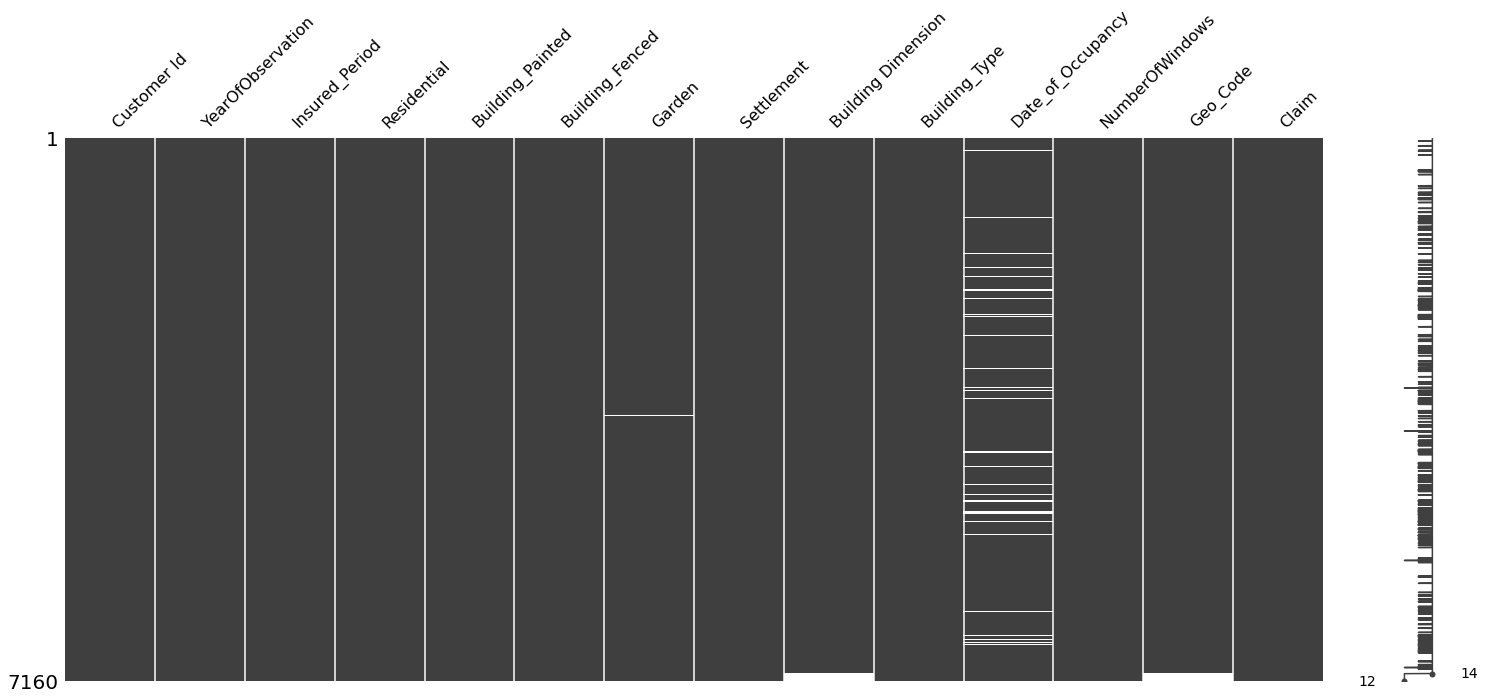

In [ ]:
msno.matrix(train_raw)

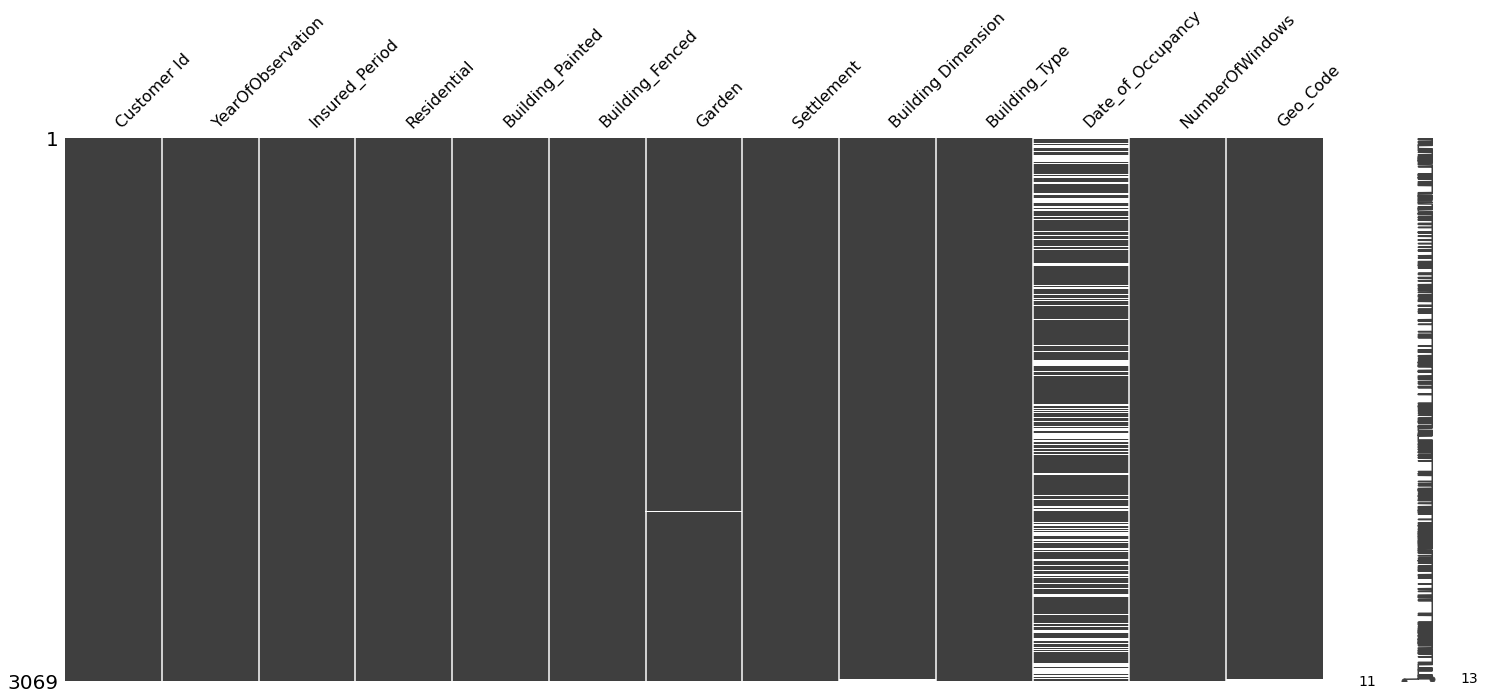

In [ ]:
msno.matrix(test_raw)

# Data Cleaning and Prep

## Imputations

In [ ]:
dim_mean = train_raw['Building Dimension'].mean()
train_raw['Building Dimension'] = train_raw['Building Dimension'].fillna(dim_mean)
train_raw.isna().sum()

#same for test set
dim_mean = test_raw['Building Dimension'].mean()
test_raw['Building Dimension'] = test_raw['Building Dimension'].fillna(dim_mean)
test_raw.isna().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building Dimension      0
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code               13
dtype: int64

In [ ]:
dim_mean = train_raw['Garden'].mode()[0]
train_raw['Garden'] = train_raw['Garden'].fillna(dim_mean)
train_raw.isna().sum()

#same for test set
dim_mean = test_raw['Garden'].mode()[0]
test_raw['Garden'] = test_raw['Garden'].fillna(dim_mean)
test_raw.isna().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  0
Settlement              0
Building Dimension      0
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code               13
dtype: int64

In [ ]:
#train_raw.drop('Date_of_Occupancy',inplace=True,axis=1)
dim_mean = train_raw['Date_of_Occupancy'].mode()[0]
train_raw['Date_of_Occupancy'] = train_raw['Date_of_Occupancy'].fillna(dim_mean)
train_raw.isna().sum()

#same for test set
dim_mean = test_raw['Date_of_Occupancy'].mode()[0]
test_raw['Date_of_Occupancy'] = test_raw['Date_of_Occupancy'].fillna(dim_mean)
test_raw.isna().sum()

Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 0
Settlement             0
Building Dimension     0
Building_Type          0
Date_of_Occupancy      0
NumberOfWindows        0
Geo_Code              13
dtype: int64

In [ ]:
#train_raw.Geo_Code.nunique()
dim_mean = train_raw['Geo_Code'].mode()[0]
train_raw['Geo_Code'] = train_raw['Geo_Code'].fillna(dim_mean)
train_raw.isna().sum()

#same for test set
dim_mean = test_raw['Geo_Code'].mode()[0]
test_raw['Geo_Code'] = test_raw['Geo_Code'].fillna(dim_mean)
test_raw.isna().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
dtype: int64

## Dummy Variables

In [ ]:
#Simple label encoding
lb_make = LabelEncoder()
train_raw_labelenc = train_raw.copy()
train_raw_labelenc['Building_Painted'] = lb_make.fit_transform(train_raw_labelenc['Building_Painted'])
train_raw_labelenc['Building_Fenced'] = lb_make.fit_transform(train_raw_labelenc['Building_Fenced'])
train_raw_labelenc['Garden'] = lb_make.fit_transform(train_raw_labelenc['Garden'])
train_raw_labelenc['Settlement'] = lb_make.fit_transform(train_raw_labelenc['Settlement'])
train_raw_labelenc['NumberOfWindows'] = lb_make.fit_transform(train_raw_labelenc['NumberOfWindows'])
train_raw_labelenc['Geo_Code'] = lb_make.fit_transform(train_raw_labelenc['Geo_Code'])

#same for test set
test_raw_labelenc = test_raw.copy()
test_raw_labelenc['Building_Painted'] = lb_make.fit_transform(test_raw_labelenc['Building_Painted'])
test_raw_labelenc['Building_Fenced'] = lb_make.fit_transform(test_raw_labelenc['Building_Fenced'])
test_raw_labelenc['Garden'] = lb_make.fit_transform(test_raw_labelenc['Garden'])
test_raw_labelenc['Settlement'] = lb_make.fit_transform(test_raw_labelenc['Settlement'])
test_raw_labelenc['NumberOfWindows'] = lb_make.fit_transform(test_raw_labelenc['NumberOfWindows'])
test_raw_labelenc['Geo_Code'] = lb_make.fit_transform(test_raw_labelenc['Geo_Code'])

In [ ]:
train_raw_onehotenc = train_raw_labelenc.copy()
train_raw_onehotenc = pd.get_dummies(train_raw_onehotenc, columns=['Building_Painted','Building_Fenced','Garden','Settlement','Building_Type','NumberOfWindows','Geo_Code'])

#same for test set
test_raw_onehotenc = test_raw_labelenc.copy()
test_raw_onehotenc = pd.get_dummies(test_raw_onehotenc, columns=['Building_Painted','Building_Fenced','Garden','Settlement','Building_Type','NumberOfWindows','Geo_Code'])

In [ ]:
test_raw_onehotenc.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building Dimension,Date_of_Occupancy,Building_Painted_0,Building_Painted_1,Building_Fenced_0,Building_Fenced_1,Garden_0,Garden_1,Settlement_0,Settlement_1,Building_Type_1,Building_Type_2,Building_Type_3,Building_Type_4,NumberOfWindows_0,NumberOfWindows_1,NumberOfWindows_2,NumberOfWindows_3,NumberOfWindows_4,NumberOfWindows_5,NumberOfWindows_6,NumberOfWindows_7,NumberOfWindows_8,NumberOfWindows_9,NumberOfWindows_10,Geo_Code_0,Geo_Code_1,Geo_Code_2,Geo_Code_3,Geo_Code_4,Geo_Code_5,Geo_Code_6,Geo_Code_7,Geo_Code_8,Geo_Code_9,Geo_Code_10,...,Geo_Code_657,Geo_Code_658,Geo_Code_659,Geo_Code_660,Geo_Code_661,Geo_Code_662,Geo_Code_663,Geo_Code_664,Geo_Code_665,Geo_Code_666,Geo_Code_667,Geo_Code_668,Geo_Code_669,Geo_Code_670,Geo_Code_671,Geo_Code_672,Geo_Code_673,Geo_Code_674,Geo_Code_675,Geo_Code_676,Geo_Code_677,Geo_Code_678,Geo_Code_679,Geo_Code_680,Geo_Code_681,Geo_Code_682,Geo_Code_683,Geo_Code_684,Geo_Code_685,Geo_Code_686,Geo_Code_687,Geo_Code_688,Geo_Code_689,Geo_Code_690,Geo_Code_691,Geo_Code_692,Geo_Code_693,Geo_Code_694,Geo_Code_695,Geo_Code_696
0,H11920,2013,1.000000,0,300.0,1960.0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,H11921,2016,0.997268,0,300.0,1960.0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,H9805,2013,0.369863,0,790.0,1960.0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,H7493,2014,1.000000,0,1405.0,2004.0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,H7494,2016,1.000000,0,1405.0,2004.0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Explantory Data Analysis

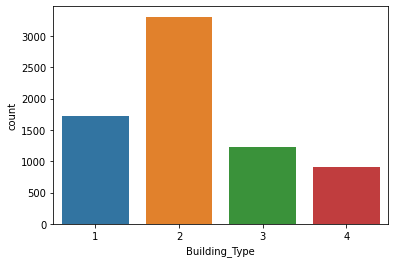

In [ ]:
sns.countplot(train_raw.Building_Type)

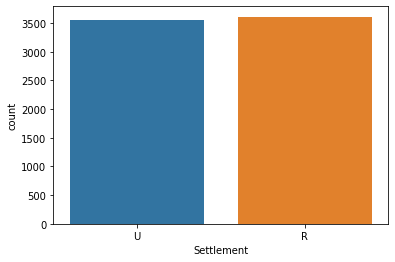

In [ ]:
sns.countplot(train_raw.Settlement)

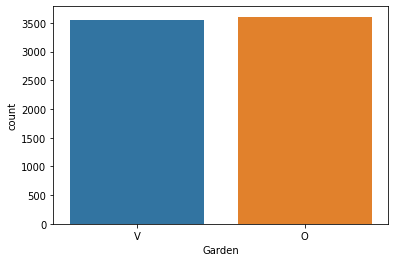

In [ ]:
sns.countplot(train_raw.Garden)

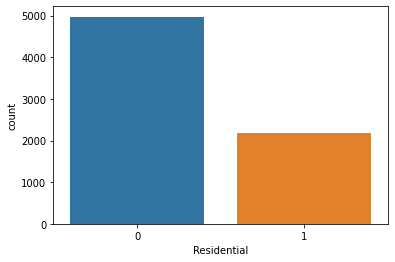

In [ ]:
sns.countplot(train_raw.Residential)

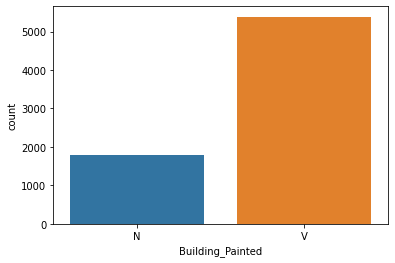

In [ ]:
sns.countplot(train_raw.Building_Painted)

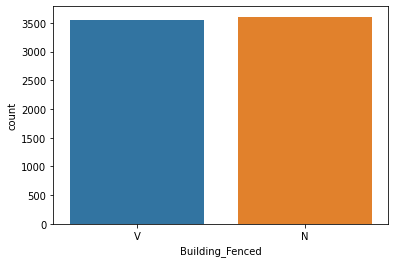

In [ ]:
sns.countplot(train_raw.Building_Fenced)

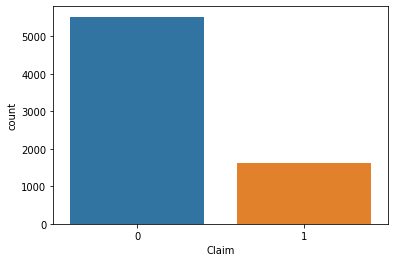

In [ ]:
sns.countplot(train_raw.Claim)

# Train-test split

In [ ]:
real_training_data = train_raw_onehotenc.copy()
y = real_training_data.Claim
real_training_data.drop('Claim',inplace=True,axis=1)
real_training_data.drop('Customer Id',inplace=True,axis=1)
X = real_training_data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()
#
#train = train_raw.copy()
#test=test_raw.copy()
#train.fillna(0, inplace=True)
#test.fillna(0,inplace=True)
#test_id = test['Customer Id']
#test.drop('Customer Id', axis=1,inplace=True)
#y = train.Claim
#train.drop('Customer Id',axis=1,inplace=True)
#train.drop('Claim',axis=1,inplace=True)
#X = train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [ ]:
catcat = np.where(X.dtypes != np.float)[0]
catcat

array([ 0,  2,  3,  4,  5,  6,  8, 10, 11])

In [ ]:
model = CatBoostClassifier(iterations=800, #leaf_estimation_iterations=10,#800
                              learning_rate=0.1,
                              depth=7,#loss_function='MultiClass',#,scale_pos_weight=200,
                             #l2_leaf_reg=5,
                             bootstrap_type='Bernoulli',
                              subsample=0.9,
                              eval_metric='AUC',
                              metric_period=20,
                                   #class_weight s=0,
                              #od_type='Iter',
                              #od_wait=45,
                              #random_seed=10,
                              allow_writing_files=False)
model.fit(X_train,
          y_train,
          verbose=True,cat_features=catcat,eval_set=(X_test, y_test))

CatBoostError: ignored

In [ ]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression(C=1,verbose=True)
lgr.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=True,
                   warm_start=False)

In [ ]:
test_raw_onehotenc.drop('Customer Id',axis=1,inplace=True)
y_pred=lgr.predict_proba(test_raw_onehotenc)[:, 1]

ValueError: ignored

# Model Training

In [ ]:
y_pred=model.predict_proba(test)[:, 1]
#test.head()

In [ ]:
d = {"Customer Id": test_id, 'Claim': y_pred}
test_predictions = pd.DataFrame(data=d)
test_predictions = test_predictions[["Customer Id", 'Claim']]

In [ ]:
test_predictions.to_csv('final_sub.csv', index=False)

In [ ]:
sub['Claim'] = pred[:3068]

In [ ]:
sub.to_csv('final_sub.csv',index=False)

In [ ]:
from google.colab import files
files.download('final_sub.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
len(test_raw_onehotenc),len(sub)

(3069, 3068)